# K MEANS

In [2]:
import cv2 #  computer vision
from skimage.io import imread
import numpy as np # matrix math
from matplotlib import pyplot as plt # Plotting software to help us visualize some things

from sklearn.preprocessing import PolynomialFeatures  # making math equations
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score # solving math equations

import warnings
warnings.filterwarnings("ignore")  # hides some warnings

# Reshape semua warna ke 1 aray panjang
image_cropped = imread('garut_25_rlt.png')
(h,w,c) = image_cropped.shape
img2D = image_cropped.reshape(h*w,c)
print(img2D)
print(img2D.shape)

[[237 192 184]
 [251 194 176]
 [248 182 172]
 ...
 [179  94  96]
 [171 100  87]
 [193 115  95]]
(166464, 3)


In [3]:
# K - means

from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2) # Ini nanti bisa di-input berapa aja
cluster_labels = kmeans_model.fit_predict(img2D)
print(cluster_labels)

[1 1 1 ... 0 0 0]


In [4]:
# CLUSTER LABEL

from collections import Counter
labels_count = Counter(cluster_labels)
print(labels_count)
print("----KOORDINAT RGB----")
rgb_cols = kmeans_model.cluster_centers_.round(0).astype(int)
print(rgb_cols)

Counter({0: 123109, 1: 43355})
----KOORDINAT RGB----
[[195 111 102]
 [237 176 165]]


Text(0.5, 1.0, 'Color Quantized Image')

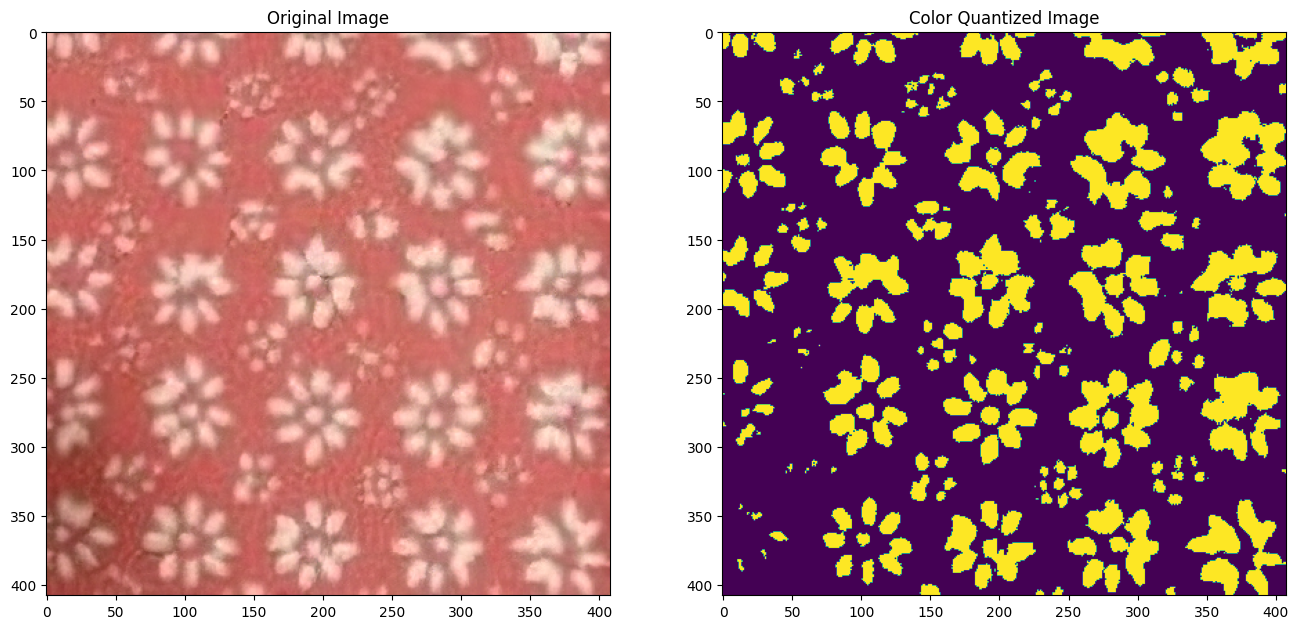

In [5]:
from PIL import Image


img_quant = np.reshape(rgb_cols[cluster_labels],(h,w,c))
fig, ax = plt.subplots(1,2, figsize=(16,12))
ax[0].imshow(image_cropped)
ax[0].set_title('Original Image')
ax[1].imshow(img_quant[:,:,2])
ax[1].set_title('Color Quantized Image')

In [6]:
img_quant.shape

(408, 408, 3)

In [7]:
img_quant = img_quant.astype("uint8")

In [8]:
import scipy
scipy.io.savemat('solo25.mat', {'mydata': img_quant})

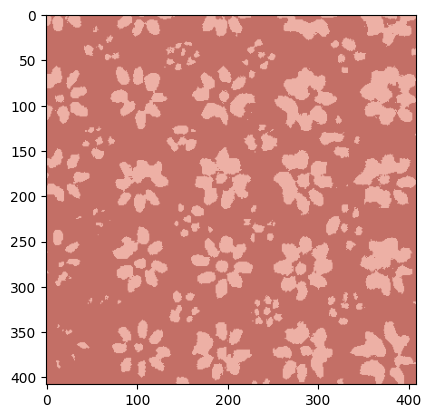

In [9]:
plt.imshow(img_quant)
plt.savefig("image.jpg")

In [10]:
# Convert ndarray gambarnya ke Image

from PIL import Image as im

z = img_quant 
y = z.astype(np.uint8)

bismillah = im.fromarray(y)


with bismillah as image:
        color_count = {}
        width, height = bismillah.size
        rgb_image = bismillah.convert('RGB')

        # iterate through each pixel in the image and keep a count per unique color
        for x in range(width):
            for y in range(height):
                rgb = rgb_image.getpixel((x, y))

                if rgb in color_count:
                    color_count[rgb] += 1
                else:
                    color_count[rgb] = 1
                    
        print('Jumlah piksel setiap warna:')
        print('-' * 30)
        color_index = 1
        for color, count in color_count.items():
            # if color == args.ignore-color:
            #    pass

            try:
                print('{}.) {}: {}'.format(color_index, color, count))
        
            except ValueError:                
                print('{}.) {}: {}'.format(color_index, color, count))
            color_index += 1

Jumlah piksel setiap warna:
------------------------------
1.) (237, 176, 165): 43355
2.) (195, 111, 102): 123109


# PIE CHART

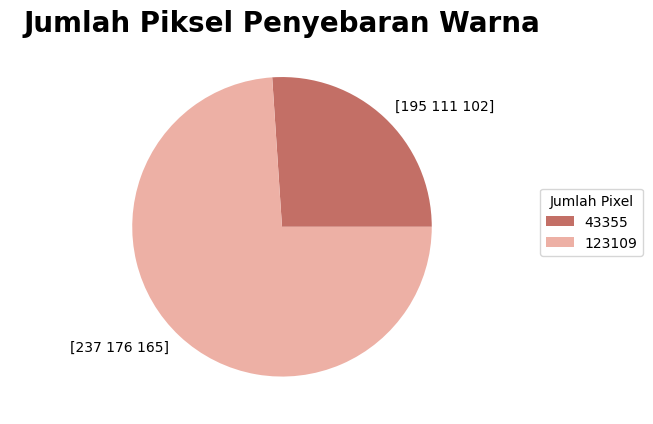

In [11]:
# JANGAN DIUBAH LAGI

image = image_cropped

def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (1200, 3000), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

def color_analysis(img):
    clf = kmeans_model
    color_labels = cluster_labels
    center_colors = rgb_cols
    # counts = labels_count
    # ob = labels_count
    # counter.keys()
    # keys = labels_count.keys()

    counts = labels_count
    counts = dict(sorted(counts.items()))
    ordered_colors = [center_colors[i] for i in counts.keys()]

    # Key Frame
    # print(labels_count.keys())

    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    jumlah = labels_count.values()

    plt.gca().axis("equal")
    pie = plt.pie(jumlah, labels = center_colors, colors = hex_colors)

    plt.title("Jumlah Piksel Penyebaran Warna", size = 20, weight="bold")
    plt.legend(pie[0],jumlah, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, bbox_transform=plt.gcf().transFigure, title = 'Jumlah Pixel')
    plt.subplots_adjust(left = 0.0, bottom=0.1,right=0.85)

    # Mau convert rgb ke hex, tp masalahnya ordered_colors ini list
    

modified_image = prep_image(image)
color_analysis(modified_image)